## Preprocessing

In [36]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [37]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [39]:
df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [40]:
df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [41]:
#data cleaning steps

#drop EIN and Name Columns
#Fix Categories-How many values per column and bucket lower ones into "Other"

#OneHoteNCODE
#Scale


In [42]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'

df2=df.copy()

df2=df2.drop(["EIN","NAME"], axis=1)

df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [43]:
# Determine the number of unique values in each column.
df2.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [44]:
#Aks AMount is not categorical and the only other ones that have more than 10 unique values are aaplication type and classification

In [45]:
# Look at APPLICATION_TYPE value counts for binning
df2.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [46]:
df2.APPLICATION_TYPE.value_counts()<500

T3     False
T4     False
T6     False
T5     False
T19    False
T8     False
T7     False
T10    False
T9      True
T13     True
T12     True
T2      True
T25     True
T14     True
T29     True
T15     True
T17     True
Name: APPLICATION_TYPE, dtype: bool

In [47]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9","T13", "T12", "T2", "T25", "T14", "T29", "T15","T17"]

# Replace in dataframe
for app in application_types_to_replace:
    df2['APPLICATION_TYPE'] = df2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [48]:
# Look at CLASSIFICATION value counts for binning
df2.CLASSIFICATION.value_counts()<500

C1000    False
C2000    False
C1200    False
C3000    False
C2100    False
         ...  
C4120     True
C8210     True
C2561     True
C4500     True
C2150     True
Name: CLASSIFICATION, Length: 71, dtype: bool

In [49]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df2.CLASSIFICATION.value_counts().loc[df2.CLASSIFICATION.value_counts()>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [50]:
df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts()<700].index

Index(['C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300',
       'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120',
       'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235',
       'C1237', 'C7210', 'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260',
       'C2710', 'C0', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C2190',
       'C4200', 'C2600', 'C5200', 'C1370', 'C1248', 'C6100', 'C1820', 'C1900',
       'C1236', 'C3700', 'C2570', 'C1580', 'C1245', 'C2500', 'C1570', 'C1283',
       'C2380', 'C1732', 'C1728', 'C2170', 'C4120', 'C8210', 'C2561', 'C4500',
       'C2150'],
      dtype='object')

In [51]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace=df2['CLASSIFICATION'].value_counts().loc[df2['CLASSIFICATION'].value_counts()<700].index

# Replace in dataframe
for cls in classifications_to_replace:
    df2['CLASSIFICATION'] = df2['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [52]:
# Convert categorical data to numeric with `pd.get_dummies`
df2=pd.get_dummies(df2)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [53]:
# Split our preprocessed data into our features and target arrays
X=df2.drop("IS_SUCCESSFUL", axis=1)
y=df.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(25724, 44)
(8575, 44)


In [54]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
len(X.columns)

44

## Compile, Train and Evaluate the Model

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn1 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn1.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))

# Add a second layer
nn1.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Add the output layer that uses a probability activation function
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 225       
                                                                 
 dense_8 (Dense)             (None, 3)                 18        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 247 (988.00 Byte)
Trainable params: 247 (988.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Compile the Sequential model together and customize metrics
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn1.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 4s 4ms/step - loss: 0.6617 - accuracy: 0.6494
Epoch 2/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5989 - accuracy: 0.7151
Epoch 3/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5796 - accuracy: 0.7283
Epoch 4/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5733 - accuracy: 0.7278
Epoch 5/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5715 - accuracy: 0.7290
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5706 - accuracy: 0.7297
Epoch 7/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5696 - accuracy: 0.7293
Epoch 8/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.7292
Epoch 9/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5685 - accuracy: 0.7287
Epoch 10/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5674 - accura

In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5647 - accuracy: 0.7304 - 427ms/epoch - 2ms/step
Loss: 0.5647047758102417, Accuracy: 0.7303789854049683


In [59]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model.predict(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8098  3947]
 [ 2923 10756]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70     12045
           1       0.73      0.79      0.76     13679

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    



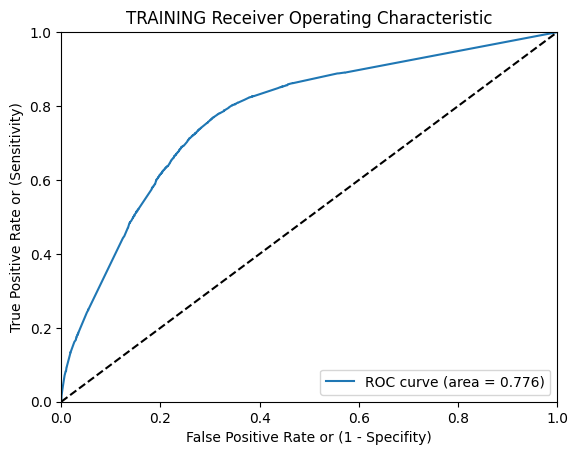



TESTING METRICS

    Test Confusion Matrix:
    [[2678 1315]
 [ 997 3585]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70      3993
           1       0.73      0.78      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



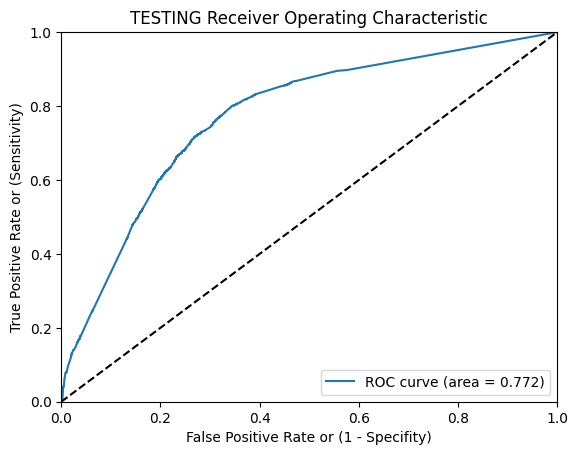

In [61]:
doClassification_NN(nn1, X_train_scaled, X_test_scaled, y_train, y_test)

In [62]:
# Export our model to HDF5 file
nn1.save("nn1.h5")

In [63]:
#Start Optimizations nn2

In [64]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=17, activation="relu", input_dim=len(X.columns)))

# Add a second layer
nn2.add(tf.keras.layers.Dense(units=8, activation="relu"))

# Add a third layer
nn2.add(tf.keras.layers.Dense(units=4, activation="relu"))

# Add the output layer that uses a probability activation function
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 17)                765       
                                                                 
 dense_11 (Dense)            (None, 8)                 144       
                                                                 
 dense_12 (Dense)            (None, 4)                 36        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 950 (3.71 KB)
Trainable params: 950 (3.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
# Compile the Sequential model together and customize metrics
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn2.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5941 - accuracy: 0.6930
Epoch 2/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5576 - accuracy: 0.7255
Epoch 3/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7275
Epoch 4/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7283
Epoch 5/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7296
Epoch 6/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7304
Epoch 7/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7313
Epoch 8/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7313
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7318
Epoch 10/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5472 - accura

In [66]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5565 - accuracy: 0.7294 - 450ms/epoch - 2ms/step
Loss: 0.5564823150634766, Accuracy: 0.7294460535049438


268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8175  3870]
 [ 2786 10893]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.68      0.71     12045
           1       0.74      0.80      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



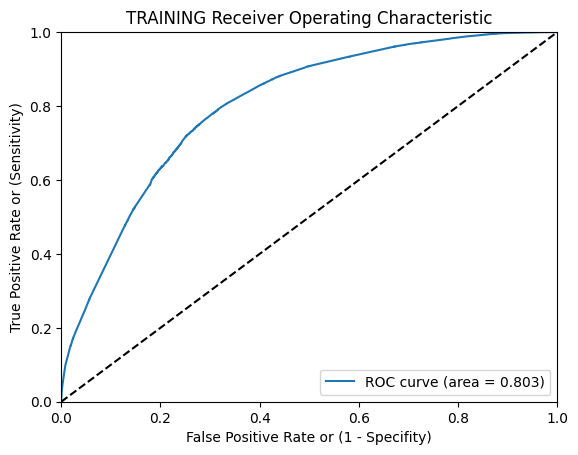



TESTING METRICS

    Test Confusion Matrix:
    [[2653 1340]
 [ 980 3602]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.66      0.70      3993
           1       0.73      0.79      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



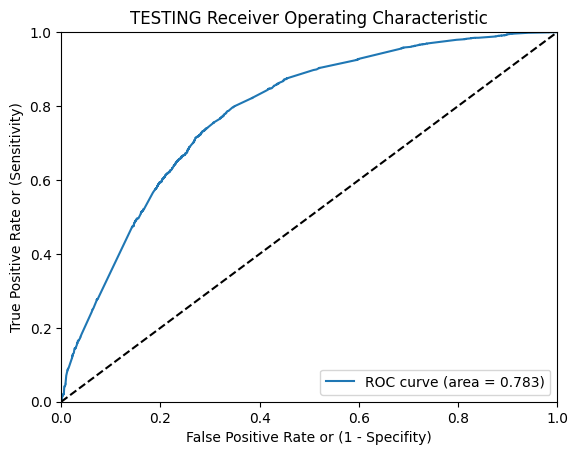

In [67]:
doClassification_NN(nn2, X_train_scaled, X_test_scaled, y_train, y_test)

In [68]:
# Export our model to HDF5 file
nn2.save("nn2.h5")

In [69]:
#Start Optimization nn3

In [71]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn3 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn3.add(tf.keras.layers.Dense(units=25, activation="relu", input_dim=len(X.columns)))

# Add a second layer
nn3.add(tf.keras.layers.Dense(units=12, activation="relu"))

# Add a third layer
nn3.add(tf.keras.layers.Dense(units=6, activation="relu"))

# Add the output layer that uses a probability activation function
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 25)                1125      
                                                                 
 dense_19 (Dense)            (None, 12)                312       
                                                                 
 dense_20 (Dense)            (None, 6)                 78        
                                                                 
 dense_21 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1522 (5.95 KB)
Trainable params: 1522 (5.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
# Compile the Sequential model together and customize metrics
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn2.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5343 - accuracy: 0.7396
Epoch 2/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7410
Epoch 3/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5345 - accuracy: 0.7395
Epoch 4/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5343 - accuracy: 0.7400
Epoch 5/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5344 - accuracy: 0.7400
Epoch 6/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7394
Epoch 7/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7402
Epoch 8/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7400
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5343 - accuracy: 0.7404
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5342 - accura

In [73]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.7023 - accuracy: 0.5642 - 623ms/epoch - 2ms/step
Loss: 0.7022592425346375, Accuracy: 0.5641982555389404


268/268 [==============================] - 1s 2ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[6269 5776]
 [5479 8200]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.53      0.52      0.53     12045
           1       0.59      0.60      0.59     13679

    accuracy                           0.56     25724
   macro avg       0.56      0.56      0.56     25724
weighted avg       0.56      0.56      0.56     25724

    



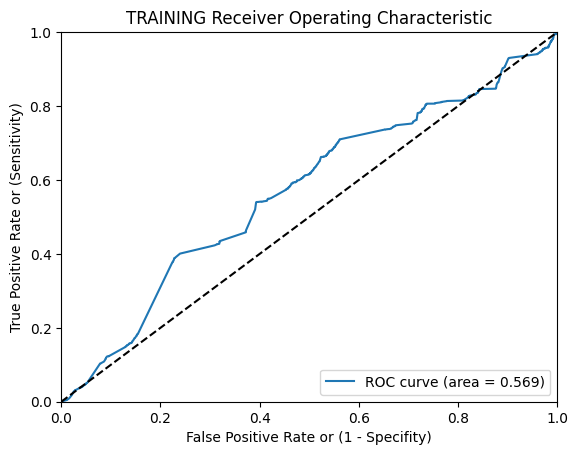



TESTING METRICS

    Test Confusion Matrix:
    [[2078 1915]
 [1822 2760]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.53      0.52      0.53      3993
           1       0.59      0.60      0.60      4582

    accuracy                           0.56      8575
   macro avg       0.56      0.56      0.56      8575
weighted avg       0.56      0.56      0.56      8575

    



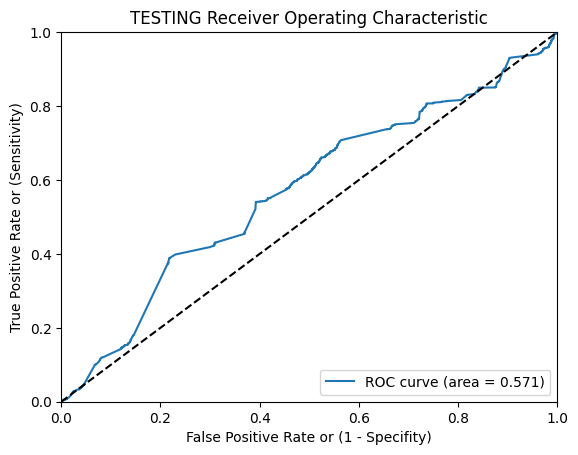

In [74]:
doClassification_NN(nn3, X_train_scaled, X_test_scaled, y_train, y_test)

In [75]:
# Export our model to HDF5 file
nn3.save("nn3.h5")

In [76]:
#Start Optimization nn4

In [77]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn4 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn4.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=len(X.columns)))

# Add a second layer
nn4.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Add a third layer
nn4.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Add the output layer that uses a probability activation function
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 30)                1350      
                                                                 
 dense_23 (Dense)            (None, 15)                465       
                                                                 
 dense_24 (Dense)            (None, 10)                160       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1986 (7.76 KB)
Trainable params: 1986 (7.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Compile the Sequential model together and customize metrics
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn4.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 3s 2ms/step - loss: 0.5779 - accuracy: 0.7146
Epoch 2/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7294
Epoch 3/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7283
Epoch 4/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7284
Epoch 5/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7299
Epoch 6/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5476 - accuracy: 0.7313
Epoch 7/500
804/804 [==============================] - 2s 3ms/step - loss: 0.5465 - accuracy: 0.7308
Epoch 8/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accuracy: 0.7325
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7310
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5452 - accura

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5688 - accuracy: 0.7293 - 448ms/epoch - 2ms/step
Loss: 0.5688163042068481, Accuracy: 0.7293294668197632


268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8011  4034]
 [ 2612 11067]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.67      0.71     12045
           1       0.73      0.81      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



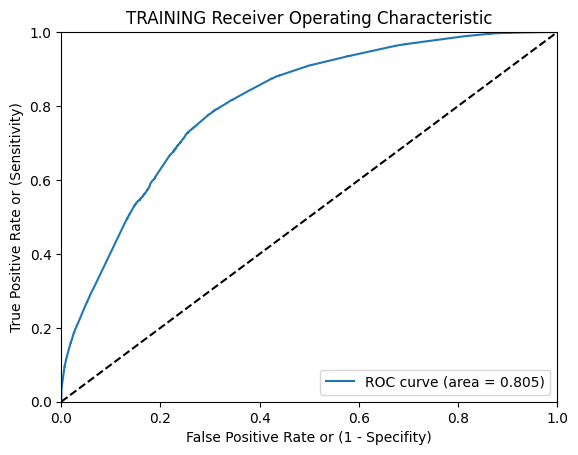



TESTING METRICS

    Test Confusion Matrix:
    [[2588 1405]
 [ 916 3666]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.74      0.65      0.69      3993
           1       0.72      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.73      8575

    



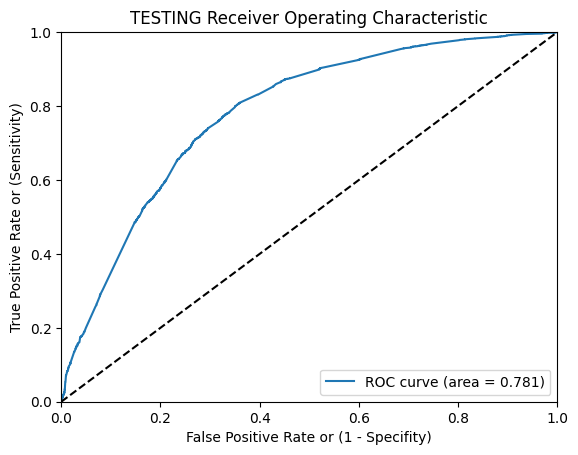

In [80]:
doClassification_NN(nn4, X_train_scaled, X_test_scaled, y_train, y_test)

In [81]:
# Export our model to HDF5 file
nn4.save("nn4.h5")

In [ ]:
#TREE BASE MODEL

In [82]:
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

TRAINING METRICS

    Train Confusion Matrix:
    [[ 8556  3489]
 [ 2809 10870]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.71      0.73     12045
           1       0.76      0.79      0.78     13679

    accuracy                           0.76     25724
   macro avg       0.75      0.75      0.75     25724
weighted avg       0.76      0.76      0.75     25724

    



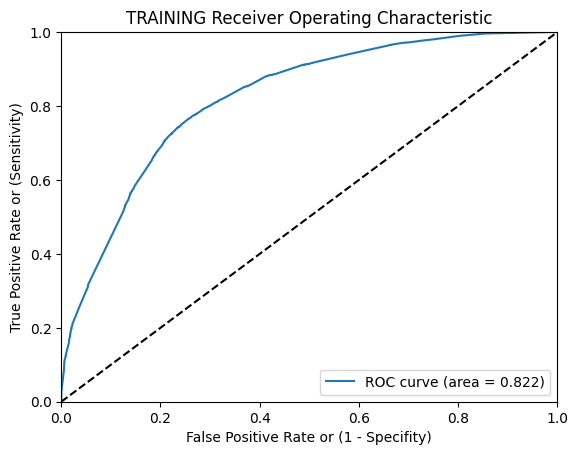



TESTING METRICS

    Test Confusion Matrix:
    [[2699 1294]
 [1075 3507]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.72      0.68      0.69      3993
           1       0.73      0.77      0.75      4582

    accuracy                           0.72      8575
   macro avg       0.72      0.72      0.72      8575
weighted avg       0.72      0.72      0.72      8575

    



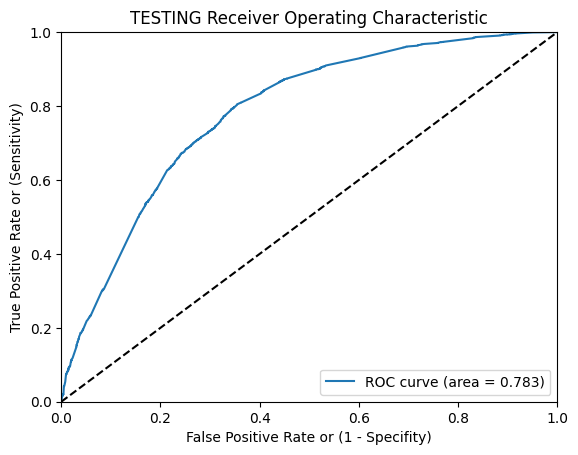

In [83]:
# initialize
xgb = XGBClassifier(random_state=42)

# fit
xgb.fit(X_train_scaled, y_train)

doClassification(xgb, X_train_scaled, X_test_scaled, y_train, y_test)

In [84]:
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [85]:
df.NAME.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64